In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mass_complete_environment_catalog.csv').drop(columns=['flag'])
df.head()
df.describe()

,id,ra,dec,photo_z,density,overdensity,s_cluster,s_filament,group_id,n_g
count,38865.000000,38865.000000,38865.000000,38865.000000,38865.000000,38865.000000,38865.000000,38865.000000,24912.000000,24912.000000
mean,631264.470681,150.071504,2.255217,0.795124,3.829429,1.620533,0.081741,0.097345,3357.129295,19.970215
std,198314.925564,0.373278,0.304013,0.257902,4.586741,1.885330,0.153174,0.131688,2043.260028,51.398352
min,243325.000000,149.410030,1.660008,0.100000,0.040000,0.010000,0.000000,0.000000,1.000000,2.000000
25%,471423.000000,149.756743,2.013965,0.622200,1.340000,0.580000,0.000844,0.007469,1675.000000,2.000000
50%,634831.000000,150.081249,2.262049,0.838800,2.490000,1.060000,0.014390,0.039772,3301.000000,4.000000
75%,801290.000000,150.387329,2.514885,0.985000,4.550000,1.950000,0.081479,0.133546,4968.000000,13.000000
max,967591.000000,150.749983,2.769985,1.200000,89.070000,35.360000,0.854799,0.821673,7231.000000,377.000000


In [3]:
df.count()

id             38865
ra             38865
dec            38865
photo_z        38865
density        38865
overdensity    38865
s_cluster      38865
s_filament     38865
environment    38865
group_id       24912
n_g            24912
galaxy_type    38865
dtype: int64

In [4]:
df = df.dropna(subset=['group_id', 'n_g']) # drop rows with na values
df = df[df['n_g'] >= 10] # filter for groups with > 10 members
df.to_csv('mass_complete_env_cleaned.csv')
df.count()

id             7554
ra             7554
dec            7554
photo_z        7554
density        7554
overdensity    7554
s_cluster      7554
s_filament     7554
environment    7554
group_id       7554
n_g            7554
galaxy_type    7554
dtype: int64

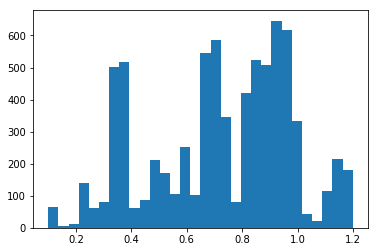

In [15]:
plt.hist(df['photo_z'], bins=30)
plt.show()

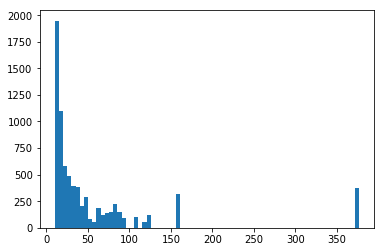

In [62]:
plt.hist(df['n_g'], bins='auto')
plt.show()

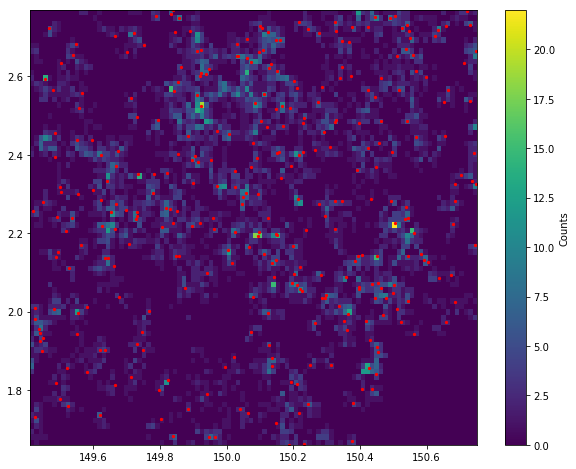

In [20]:
central = df[df['galaxy_type'] == 'central']
fig = plt.figure(figsize=(10,8))
h = plt.hist2d(df['ra'], df['dec'], bins=(100,80))
plt.scatter(central['ra'], central['dec'], color='red', s=5)
plt.colorbar(h[3], label='Counts')
plt.show()

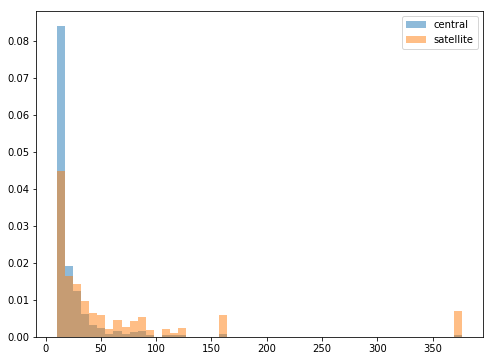

In [63]:
central_gal = df.loc[df.galaxy_type == 'central', 'n_g']
satellite_gal = df.loc[df.galaxy_type == 'satellite', 'n_g']

kwargs = dict(alpha=0.5, bins=50, density=True, stacked=True)
fig = plt.figure(figsize=(8,6))
plt.hist(central_gal, **kwargs, label='central')
plt.hist(satellite_gal, **kwargs, label='satellite')
plt.legend()
plt.show()

In [74]:
df.groupby('n_g').nunique().count()

id             59
ra             59
dec            59
photo_z        59
density        59
overdensity    59
s_cluster      59
s_filament     59
environment    59
group_id       59
n_g            59
galaxy_type    59
dtype: int64

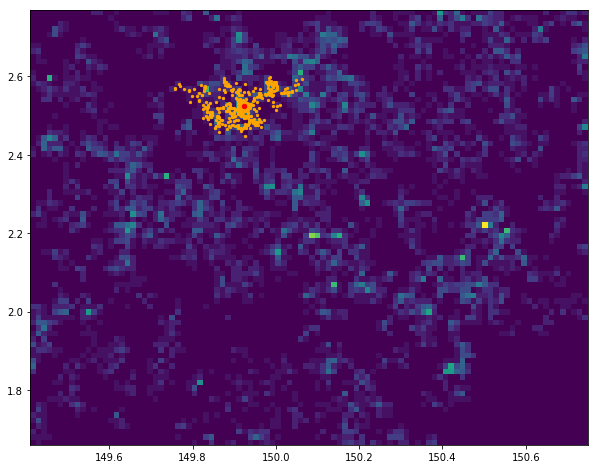

In [103]:
fig = plt.figure(figsize=(10,8))
plt.hist2d(df['ra'], df['dec'], bins=(100,80))

max_n_g = df['n_g'].max() # largest group size
max_central = np.logical_and(df.n_g == max_n_g, df.galaxy_type == 'central') 
central_max = df[max_central] # central galaxy of largest group
max_df = df.loc[df.n_g == max_n_g, 'ra':'dec'] # member galaxies of largest group

plt.scatter(max_df['ra'], max_df['dec'], color='orange', s=5)
plt.scatter(central_max['ra'], central_max['dec'], color='red', s=20)
plt.show()